In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
from functions.evaluation import Evaluator, EvaluationResult
from functions import load
from pandas import read_csv

df_user = read_csv('../data/ridge_features_refined_data.csv')
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Area,2927.0,7.476842e-16,1.000171,-3.775920,-0.346207,0.120200,0.514420,6.272148
Overall_Qual,2927.0,6.090878e+00,1.406195,1.000000,5.000000,6.000000,7.000000,10.000000
Overall_Cond,2927.0,5.563717e+00,1.111960,1.000000,5.000000,5.000000,6.000000,9.000000
Mas_Vnr_Area,2927.0,0.000000e+00,1.000171,-0.790677,-0.790677,-0.790677,1.156440,2.029755
Exter_Qual,2927.0,2.396994e+00,0.578344,1.000000,2.000000,2.000000,3.000000,4.000000
...,...,...,...,...,...,...,...,...
Garage_Type_No_Garage,2927.0,5.363854e-02,0.225342,0.000000,0.000000,0.000000,0.000000,1.000000
Sale_Type_'WD ',2927.0,8.664161e-01,0.340263,0.000000,1.000000,1.000000,1.000000,1.000000
Year_Sold,2927.0,2.007791e+03,1.317120,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000
Mo_Sold,2927.0,6.215237e+00,2.712368,1.000000,4.000000,6.000000,8.000000,12.000000


In [3]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0, n_jobs=4)
evaluator = Evaluator(rf, df_user, 'Sale_Price')

evaluator.split_dataset()
evaluator.fit_model()

In [4]:
evaluator.temporal_cv().inline()

'r2: 0.88376  -  explained_variance: 0.88582  -  rmse: 0.33488  -  mae: 0.16860  -  max_error: 1.74748'

In [5]:
evaluator.evaluate()

r2:                  0.86852
explained_variance:  0.86976
rmse:                0.36646
mae:                 0.16052
max_error:           3.73027

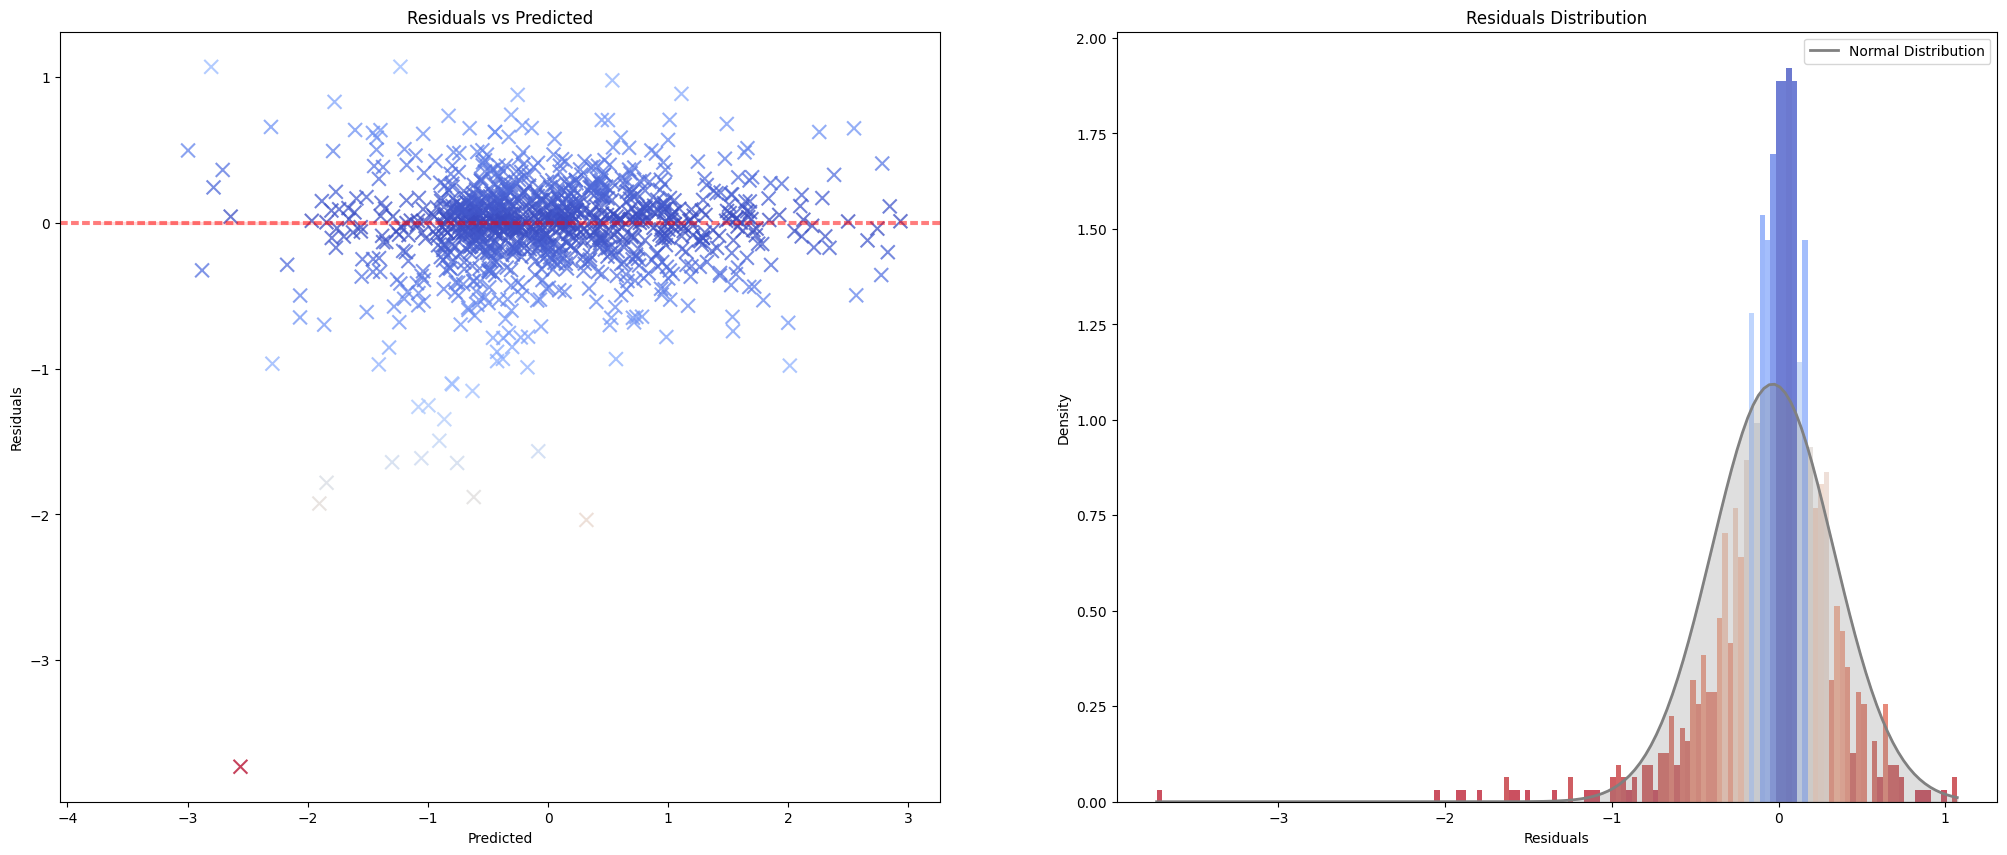

In [6]:
evaluator.plot_residuals()

In [7]:
params, scores = evaluator.grid_search_cv(params={
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 20, 50, 100]
})

load.saveBestParameterModel(type(evaluator.model).__name__,params)
print('Best parameters: ', params)
print('Best score: ', scores)

Best parameters:  {'max_depth': 20, 'n_estimators': 500, 'model_name': 'RandomForestRegressor'}
Best score:  0.9009260731263048


In [8]:
evaluator.model = RandomForestRegressor(n_estimators=500, max_depth=50)
evaluator.fit_model()
evaluator.evaluate()

r2:                  0.87158
explained_variance:  0.87285
rmse:                0.36216
mae:                 0.14824
max_error:           3.75429

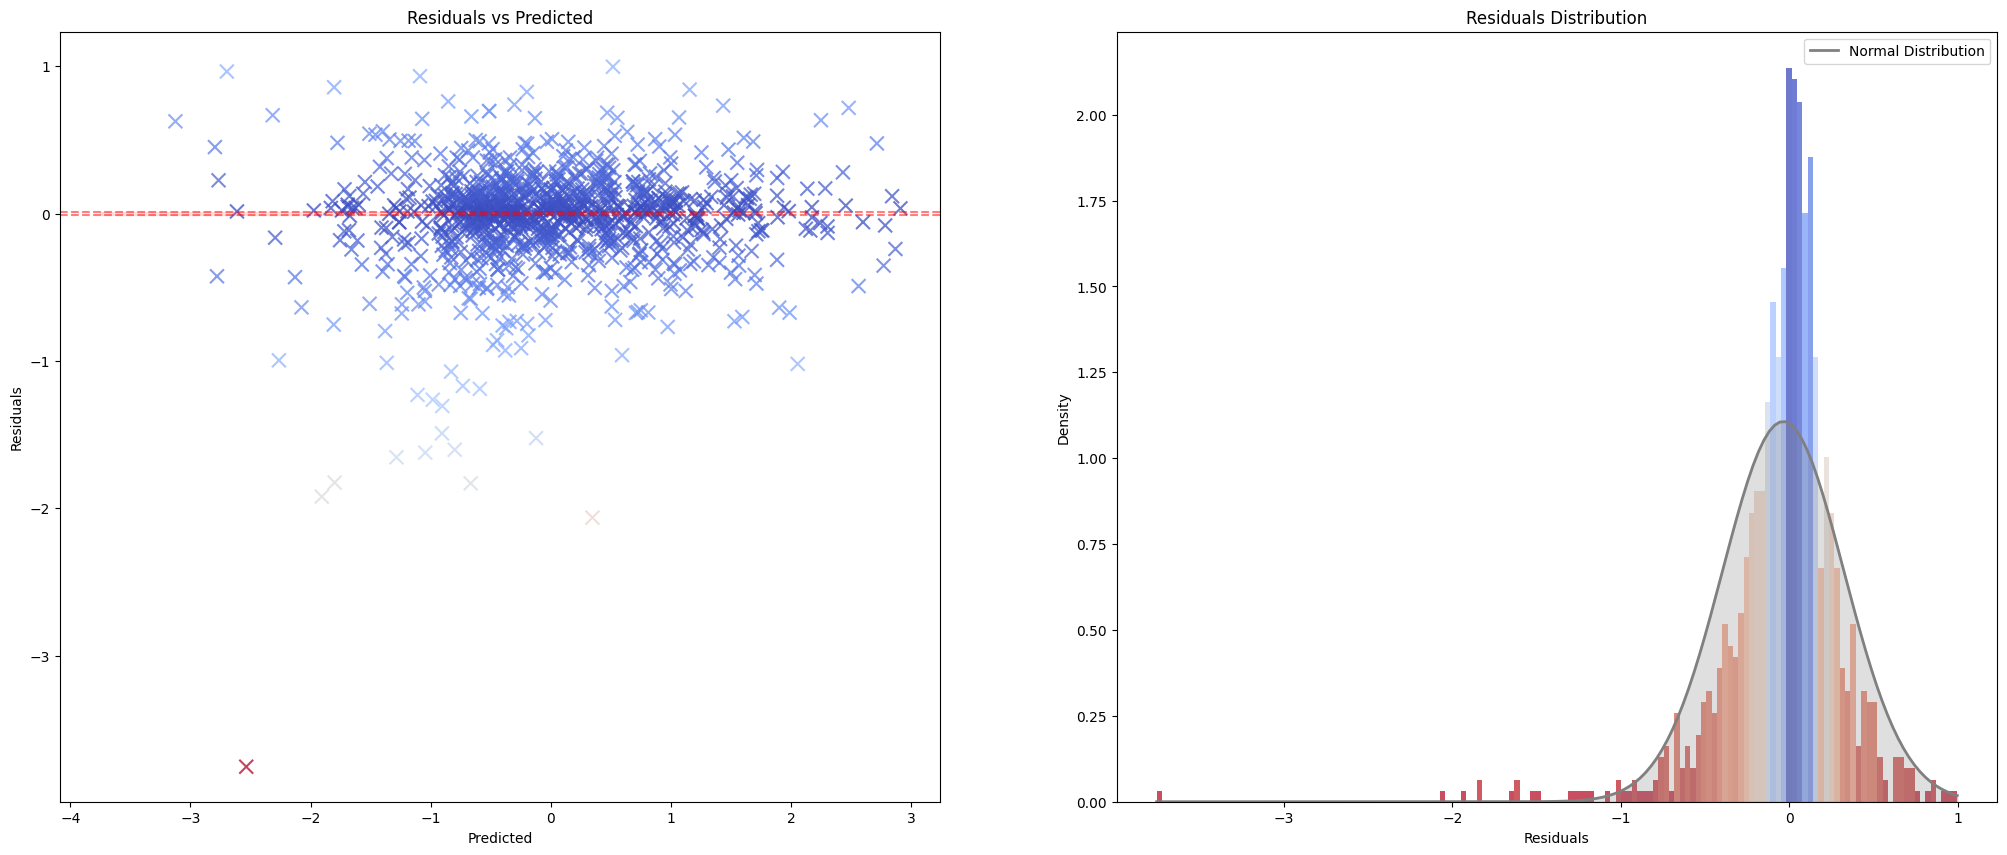

In [9]:
evaluator.plot_residuals()